In [56]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Prepando dados mensais de Dez, Nov e Out-21

In [57]:
urlDez = "http://vps-40d69db1.vps.ovh.ca:22001/api/RegraProjecaos/tickerPerformance?dataNumInicio=20211201&dataNumFinal=20211231&grupoAcao=Neg-100&codigoRegra=1"

In [58]:
urlNov = "http://vps-40d69db1.vps.ovh.ca:22001/api/RegraProjecaos/tickerPerformance?dataNumInicio=20211101&dataNumFinal=20211130&grupoAcao=Neg-100&codigoRegra=1"

In [59]:
urlOut = "http://vps-40d69db1.vps.ovh.ca:22001/api/RegraProjecaos/tickerPerformance?dataNumInicio=20211001&dataNumFinal=20211031&grupoAcao=Neg-100&codigoRegra=1"

In [60]:
r = requests.get(urlDez)
j = r.json()
dfDez = pd.DataFrame.from_dict(j)
dfDez.set_index('ticker', inplace=True)

r = requests.get(urlNov)
j = r.json()
dfNov = pd.DataFrame.from_dict(j)
dfNov.set_index('ticker', inplace=True)

r = requests.get(urlOut)
j = r.json()
dfOut = pd.DataFrame.from_dict(j)
dfOut.set_index('ticker', inplace=True)

In [61]:
dfVendaDez = dfDez.sort_values(by='negativos', ascending=False)
dfVendaNov = dfNov.sort_values(by='negativos', ascending=False)
dfVendaOut = dfOut.sort_values(by='negativos', ascending=False)

## Trabalhando Vendas em percentual por mês

In [62]:
dfVendaDez['percentDez'] = (dfVendaDez['negativos'] / dfVendaDez['ticks']) * 100
dfVendaDez = dfVendaDez['percentDez'].to_frame()
dfVendaDez.head(20)

,percentDez
ticker,
NTCO3,86.666667
STBP3,80.869565
CVCB3,77.101449
WEGE3,71.884058
BPAC11,70.144928
PCAR3,70.144928
YDUQ3,68.115942
LREN3,61.159420
BPAN4,58.840580


In [63]:
dfVendaNov['percentNov'] = (dfVendaNov['negativos'] / dfVendaNov['ticks']) * 100
dfVendaNov = dfVendaNov['percentNov'].to_frame()
dfVendaNov.head(20)

,percentNov
ticker,
LREN3,100.000000
NTCO3,99.000000
WIZS3,96.333333
ECOR3,95.333333
MRFG3,94.333333
CVCB3,88.666667
AZUL4,85.000000
GNDI3,84.666667
LWSA3,84.000000


In [64]:
dfVendaOut['percentOut'] = (dfVendaOut['negativos'] / dfVendaOut['ticks']) * 100
dfVendaOut = dfVendaOut['percentOut'].to_frame()
dfVendaOut.head(20)

,percentOut
ticker,
NTCO3,100.000000
WIZS3,100.000000
GOAU4,99.666667
LREN3,99.333333
BRKM5,99.333333
CVCB3,97.666667
CSNA3,96.333333
AZUL4,95.333333
VALE3,95.000000


In [65]:
dfVenda = dfVendaDez.join(dfVendaNov.join(dfVendaOut))

In [66]:
dfVenda['total'] = dfVenda['percentDez'] + dfVenda['percentNov'] + dfVenda['percentOut']

In [67]:
dfVenda = dfVenda.sort_values(by='total', ascending=False)

In [68]:
dfVenda.head(25)

,percentDez,percentNov,percentOut,total
ticker,,,,
NTCO3,86.666667,99.000000,100.000000,285.666667
CVCB3,77.101449,88.666667,97.666667,263.434783
LREN3,61.159420,100.000000,99.333333,260.492754
WEGE3,71.884058,78.333333,94.666667,244.884058
AZUL4,42.898551,85.000000,95.333333,223.231884
WIZS3,19.710145,96.333333,100.000000,216.043478
BPAC11,70.144928,63.000000,82.000000,215.144928
PCAR3,70.144928,80.000000,54.333333,204.478261
ECOR3,44.347826,95.333333,58.000000,197.681159


In [104]:
dfGrafico = dfVenda.head(20)

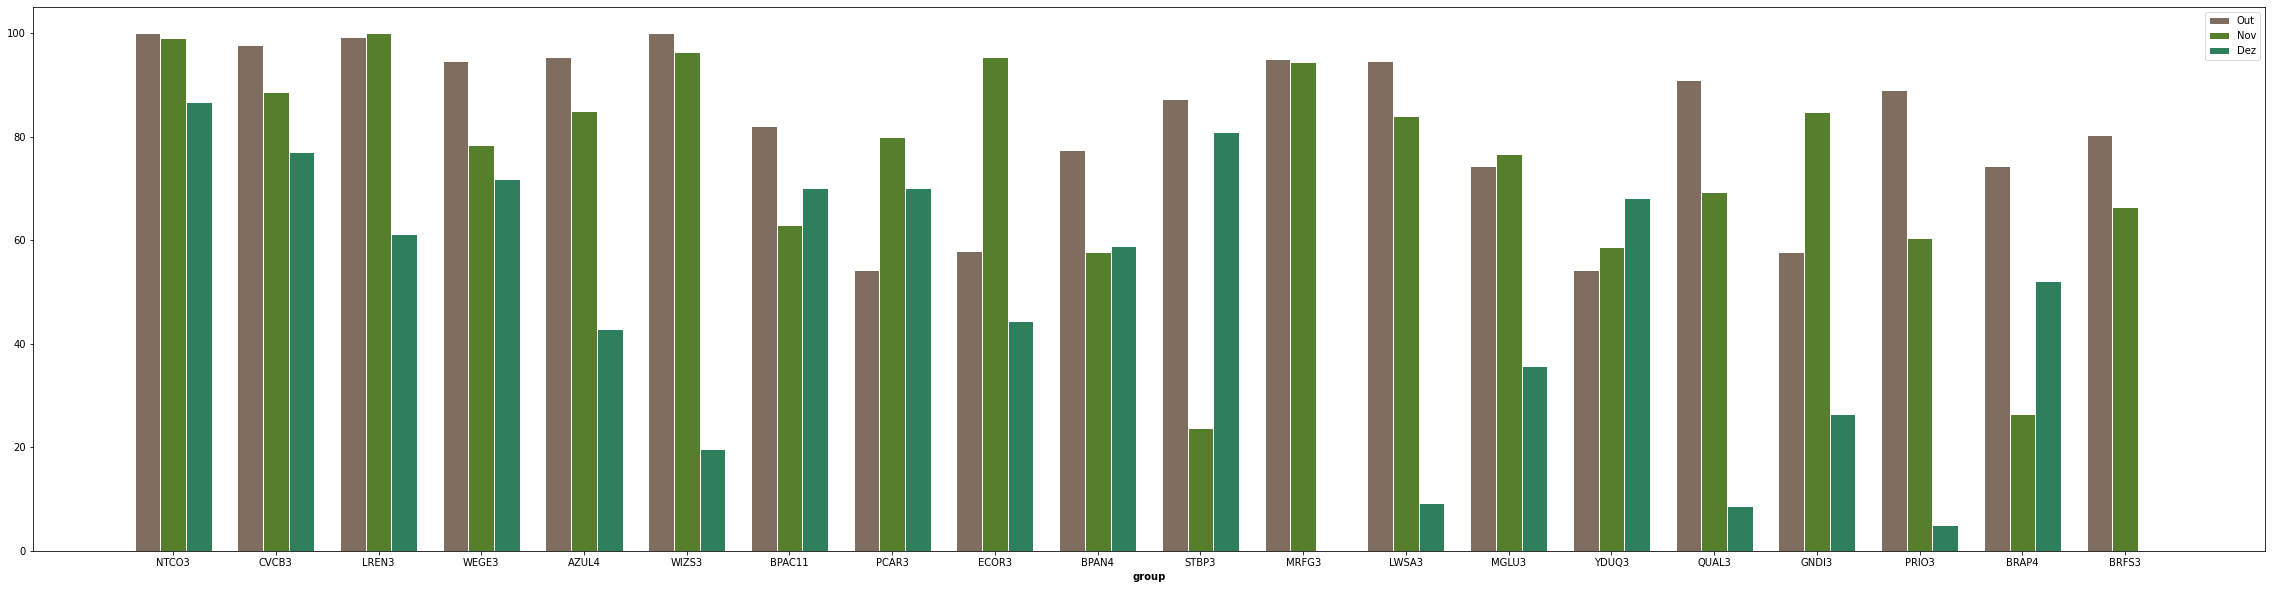

In [108]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = dfGrafico['percentOut']
bars2 = dfGrafico['percentNov']
bars3 = dfGrafico['percentDez']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Out')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Nov')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Dez')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], dfGrafico.index)
 
    


plt.rcParams["figure.figsize"] = (40,10)
# Create legend & Show graphic
plt.legend()
plt.show()